## Object Detection

Although in the location + classification task we can detect the main object present in the image, the object detection task will allow us to detect an indeterminate number of objects in the image and not just one

## Detector Types

- Two-stage detectors: In a first stage, the neural network proposes the boxes in which it believes the objects are located. In a second, the model classifies the objects within the proposed boxes. These models are more accurate but computationally more expensive, which limits their applicability in real-time applications
- Single-stage detectors: These models give the boxes and classifications at the same time, in a single stage. To do this, they use a set of pre-defined boxes. These models are less precise but very efficient, so they are used in real-time applications

## Faster R-CNN

##### The same dataset is used, the VOC dataset (torchvision's Faster R-CNN model is trained on the COCO dataset)

Import libraries and download dataset

In [ ]:
import torch
import torchvision
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
train = torchvision.datasets.VOCDetection('./data', download=True)
len(train)

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


5717

In [ ]:
voc_classes = ["background",
            "aeroplane",
            "bicycle",
            "bird",
            "boat",
            "bottle",
            "bus",
            "car",
            "cat",
            "chair",
            "cow",
            "diningtable",
            "dog",
            "horse",
            "motorbike",
            "person",
            "pottedplant",
            "sheep",
            "sofa",
            "train",
            "tvmonitor"]

Visualization of examples of images in the dataset to get an idea of the type of data with which we work

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import random

def get_sample(ix):
    img, label = train[ix]
    img_np = np.array(img)
    anns = label['annotation']['object']
    if type(anns) is not list:
        anns = [anns]
    labels = np.array([voc_classes.index(ann['name']) for ann in anns])
    bbs = [ann['bndbox'] for ann in anns]
    bbs = np.array([[int(bb['xmin']), int(bb['ymin']),int(bb['xmax'])-int(bb['xmin']),int(bb['ymax'])-int(bb['ymin'])] for bb in bbs])
    anns = (labels, bbs)
    return img_np, anns

def plot_anns(img, anns, ax=None, bg=-1, classes=voc_classes):
    # anns is a tuple with (labels, bbs)
    # bbs is an array of bounding boxes in format [x_min, y_min, width, height] 
    # labels is an array containing the label 
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    labels, bbs = anns
    for lab, bb in zip(labels, bbs):
        if bg == -1 or lab != bg:
            x, y, w, h = bb
            rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
            text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
            text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
            ax.add_patch(rect)

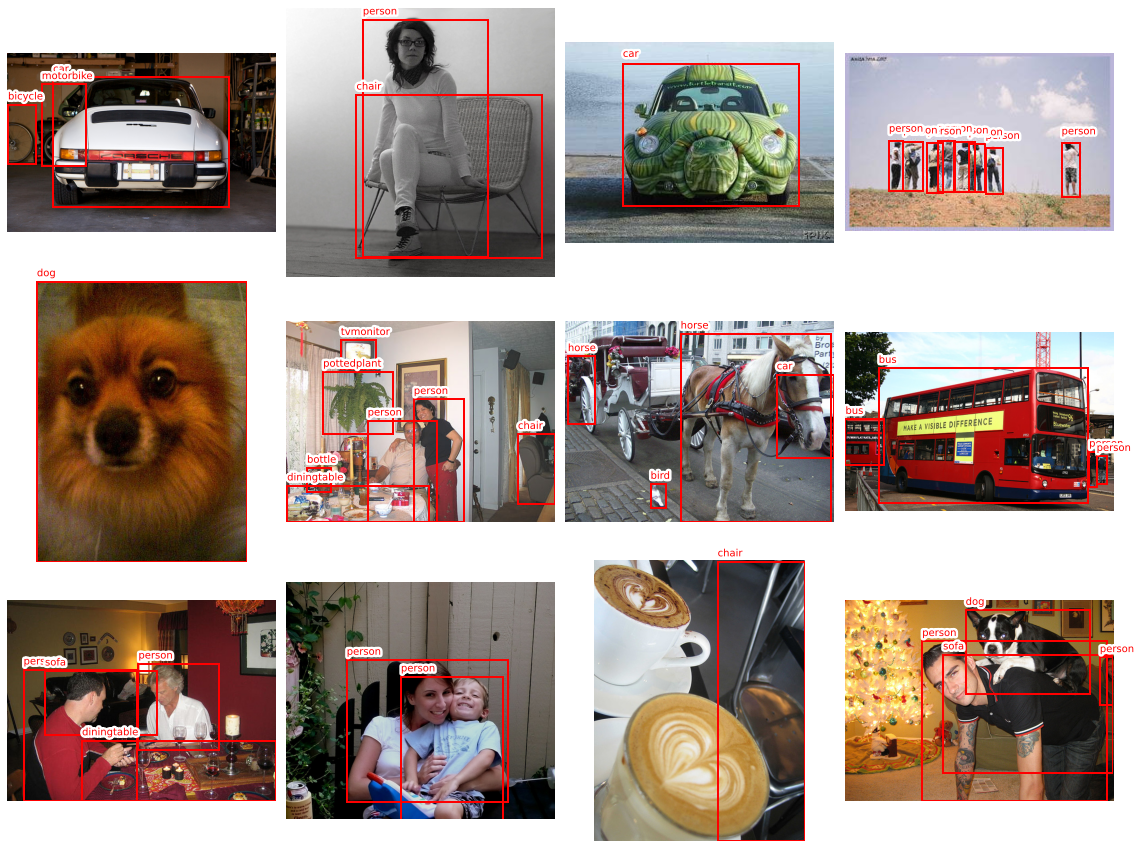

In [ ]:
r, c = 3, 4
fig = plt.figure(figsize=(4*c, 4*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(train)-1)
        img_np, anns = get_sample(ix)
        plot_anns(img_np, anns, ax)
        plt.axis("off")
plt.tight_layout()
plt.show()

## Download the trained model

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

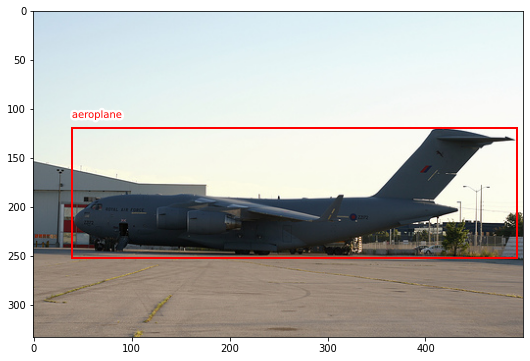

In [ ]:
img_np, anns = get_sample(4445)
plot_anns(img_np, anns)
plt.show()

## Evaluation

In [ ]:
model.eval()
outputs = model([torch.tensor(img_np / 255.).permute(2, 0, 1).float()])
outputs

[{'boxes': tensor([[ 37.4376, 123.0881, 465.7533, 244.7145],
          [395.2054, 239.3289, 417.7919, 248.7811],
          [ 83.6134, 212.1356,  97.7281, 245.2005],
          [389.6237, 239.5253, 405.0975, 248.0252],
          [ 40.6147, 171.6959, 375.7797, 246.6191],
          [394.6273, 241.2377, 407.7458, 248.6640],
          [297.5121, 236.5061, 326.4868, 249.9926],
          [297.9731, 236.9063, 325.1756, 250.0177],
          [230.6489, 119.3883, 486.6216, 229.6476],
          [ 87.7585, 211.9286,  96.6415, 232.8783],
          [273.1853, 239.2790, 299.6663, 248.0576],
          [390.4716, 239.0620, 402.1634, 245.3496],
          [ 76.5685, 229.0903,  82.8707, 246.0610],
          [  1.2251, 227.7767,  25.1209, 241.2924],
          [268.6220, 238.7137, 300.8833, 249.2730],
          [400.6866, 238.5920, 417.8362, 245.3861],
          [ 81.3748, 220.6621,  88.8553, 244.8085],
          [  1.2523, 231.9601,  17.4334, 241.2444]], grad_fn=<StackBackward0>),
  'labels': tensor([ 5,  3,

At the output we receive a list with the detections of each image (in our case only one). Each element of the list is a dict with the boxes, labels and the probabilities assigned to each detected object (which we can filter to keep, for example, those detections with a probability greater than a certain value)

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

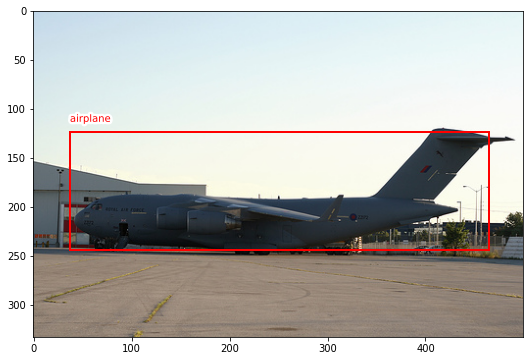

In [ ]:
img_np, anns = get_sample(4445)
# we keep the first detection
bb = outputs[0]['boxes'][0].long().tolist()
bb = [bb[0], bb[1], bb[2]-bb[0], bb[3]-bb[1]]
plot_anns(img_np, (outputs[0]['labels'][:1], [bb]), classes=COCO_INSTANCE_CATEGORY_NAMES)
plt.show()

You can play with the following cells to see detections on random images in the dataset. Because the COCO dataset has many more classes than the VOC dataset (90 vs 20), many correctly detected objects may not appear in the original annotations

In [ ]:
def predict(img, threshold=0.8):
    model.eval()
    outputs = model([torch.tensor(img_np / 255.).permute(2,0,1).float()])
    # we keep the first detection
    bb = outputs[0]['boxes'][0].long().tolist()
    bbs = [[bb[0], bb[1], bb[2]-bb[0], bb[3]-bb[1]] for o in outputs for bb, score in zip(o['boxes'].detach().numpy(), o['scores']) if score > threshold]
    labels = [lab for o in outputs for lab, score in zip(o['labels'], o['scores']) if score > threshold]
    return labels, bbs

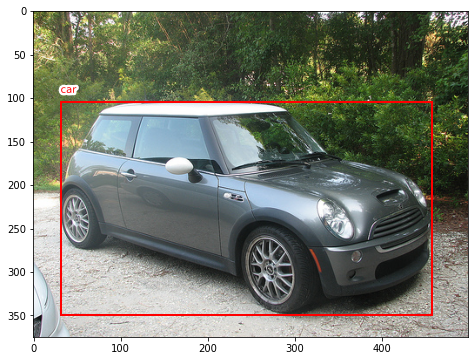

In [ ]:
ix = random.randint(0, len(train)-1)
img_np, anns = get_sample(ix)
plot_anns(img_np, anns)
plt.show()

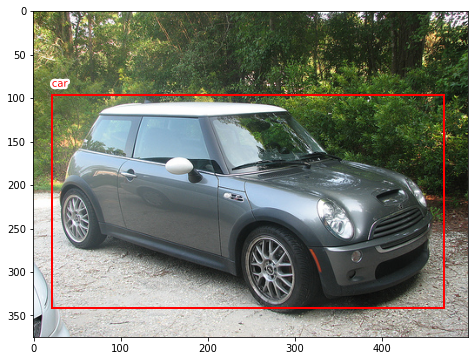

In [ ]:
anns = predict(img_np)
plot_anns(img_np, anns, classes=COCO_INSTANCE_CATEGORY_NAMES)
plt.show()